# Memphis City Park

* **Project goal**: Learn how to use _Streamlit_ library
* **Data Source**: https://data.memphistn.gov/browse?limitTo=datasets
* **Date of download of the data**: 11 November 2020
* **Data file format**: .CVS
* **Package website**: https://www.streamlit.io/

## Introduction
The goal of this project, as mentioned in the bullet list above, aim to help the creator learn how to use the _Streamlit_ package, which give the opportuntiy to create web application in a simple way, without the use of other programming language like _React.JS_, _Flask_, etc.

This project is divided into two segments, one with the data preparation (which is in this file) and the other where there is the app (in another python file).

For keeping it simple, the web app will only have the scope of viewing the data and apply certain filters, so no machine learning will be implemented.

>This project doesn't have any scientifc/economical/social/ goals, it's just used to learn how to use the specified package. So the editing of the data is purerly based on a personal choice.

## Loading package

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

pd.set_option('display.max_columns', None) # Viewing all the columns
pd.set_option('display.max_rows',None) # Showing all the data

## Loading the data

In [2]:
mem_park_df = pd.read_csv('City_of_Memphis_Parks_Spatial_Data.csv')

## Exploring the data
First a brief exploration is made, to understand the kind of data, how many empty (null) cell there are and understand what kind of data to keep for the scope of the project.

### Viewing the head of the data

In [3]:
mem_park_df.head()

,Park_Name,ParkID,Census_Tract,Council_District,LOCATION,ZipCode,Ballfield,Basketball,Benches,Concession,Fountains,Grills,Off_Street_Parking,Pavilions,Picnic_Tables,Play_Equipment,Playground,Pools,Restrooms,Tennis_Courts,Trash,Walking_Trails,FACILITIES,Additional,Acres_park,INSIDE_X,INSIDE_Y,GISTrkrID,Shape_STAr,Shape_STLe,Shape_ST_1,Shape_ST_2,point,Park_Local,Park_Manag,Park_Owner,Shelby County Zip Codes,Memphis 3.0 Planning Districts,City Council Districts
0,NaN,47480000108,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-9.999945e+06,4.182208e+06,143,2.440620e+07,27304.712431,0.000000,0.000000,POINT (-89.8310367674 35.1347474993),COUNTY OF SHELBY,CNTY,CNTY,19,3,2
1,NaN,47480000084,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.002876e+07,4.169771e+06,143,3.981989e+04,973.719759,0.000000,0.000000,POINT (-90.0898446304 35.0433311692),TURNER JOHNNIE R,PRIV,PRIV,9,13,6
2,Madison & Monroe Park,47480000164,47157011400,6,Madison & Monroe,38103.0,no,no,no,no,no,no,no,no,no,NaN,no,no,no,no,False,no,Landscaped median.,NaN,NaN,-1.002296e+07,4.183049e+06,143,2.911801e+03,253.674541,2911.800781,253.674541,POINT (-90.0377902717 35.1409236944),City of Memphis,CITY,CITY,3,8,6
3,Frayser Park,47480000017,47157010120,7,2907 N. Watkins,38127.0,yes,indoor & outdoor,no,no,no,no,yes,yes,no,NaN,yes,Outdoor,in center,8 outdoor,False,1.5 mi,"Ed Rice/Frayser Comm Center, tennis center , p...",NaN,40.54,-1.001942e+07,4.191843e+06,143,3.382008e+05,4953.348105,338200.769500,4953.348105,POINT (-90.0059795441 35.2054976787),City of Memphis,CITY,CITY,23,1,7
4,Cash Park,47480000081,47157022310,6,Ford Rd @ Deerskin Dr,38109.0,yes,outdoor,no,no,no,no,yes,no,no,NaN,yes,no,no,no,False,.5 mi,"Basketball court, play equipment, playground b...",NaN,22.00,-1.002776e+07,4.170574e+06,143,1.041129e+05,1506.721921,104112.925800,1506.721921,POINT (-90.080910372 35.0492329349),City of Memphis,CITY,CITY,9,13,6


### Viewing the type of data

In [4]:
mem_park_df.dtypes

Park_Name                          object
ParkID                              int64
Census_Tract                        int64
Council_District                    int64
LOCATION                           object
ZipCode                           float64
Ballfield                          object
Basketball                         object
Benches                            object
Concession                         object
Fountains                          object
Grills                             object
Off_Street_Parking                 object
Pavilions                          object
Picnic_Tables                      object
Play_Equipment                    float64
Playground                         object
Pools                              object
Restrooms                          object
Tennis_Courts                      object
Trash                              object
Walking_Trails                     object
FACILITIES                         object
Additional                        

### Heatmap of empty (null) data

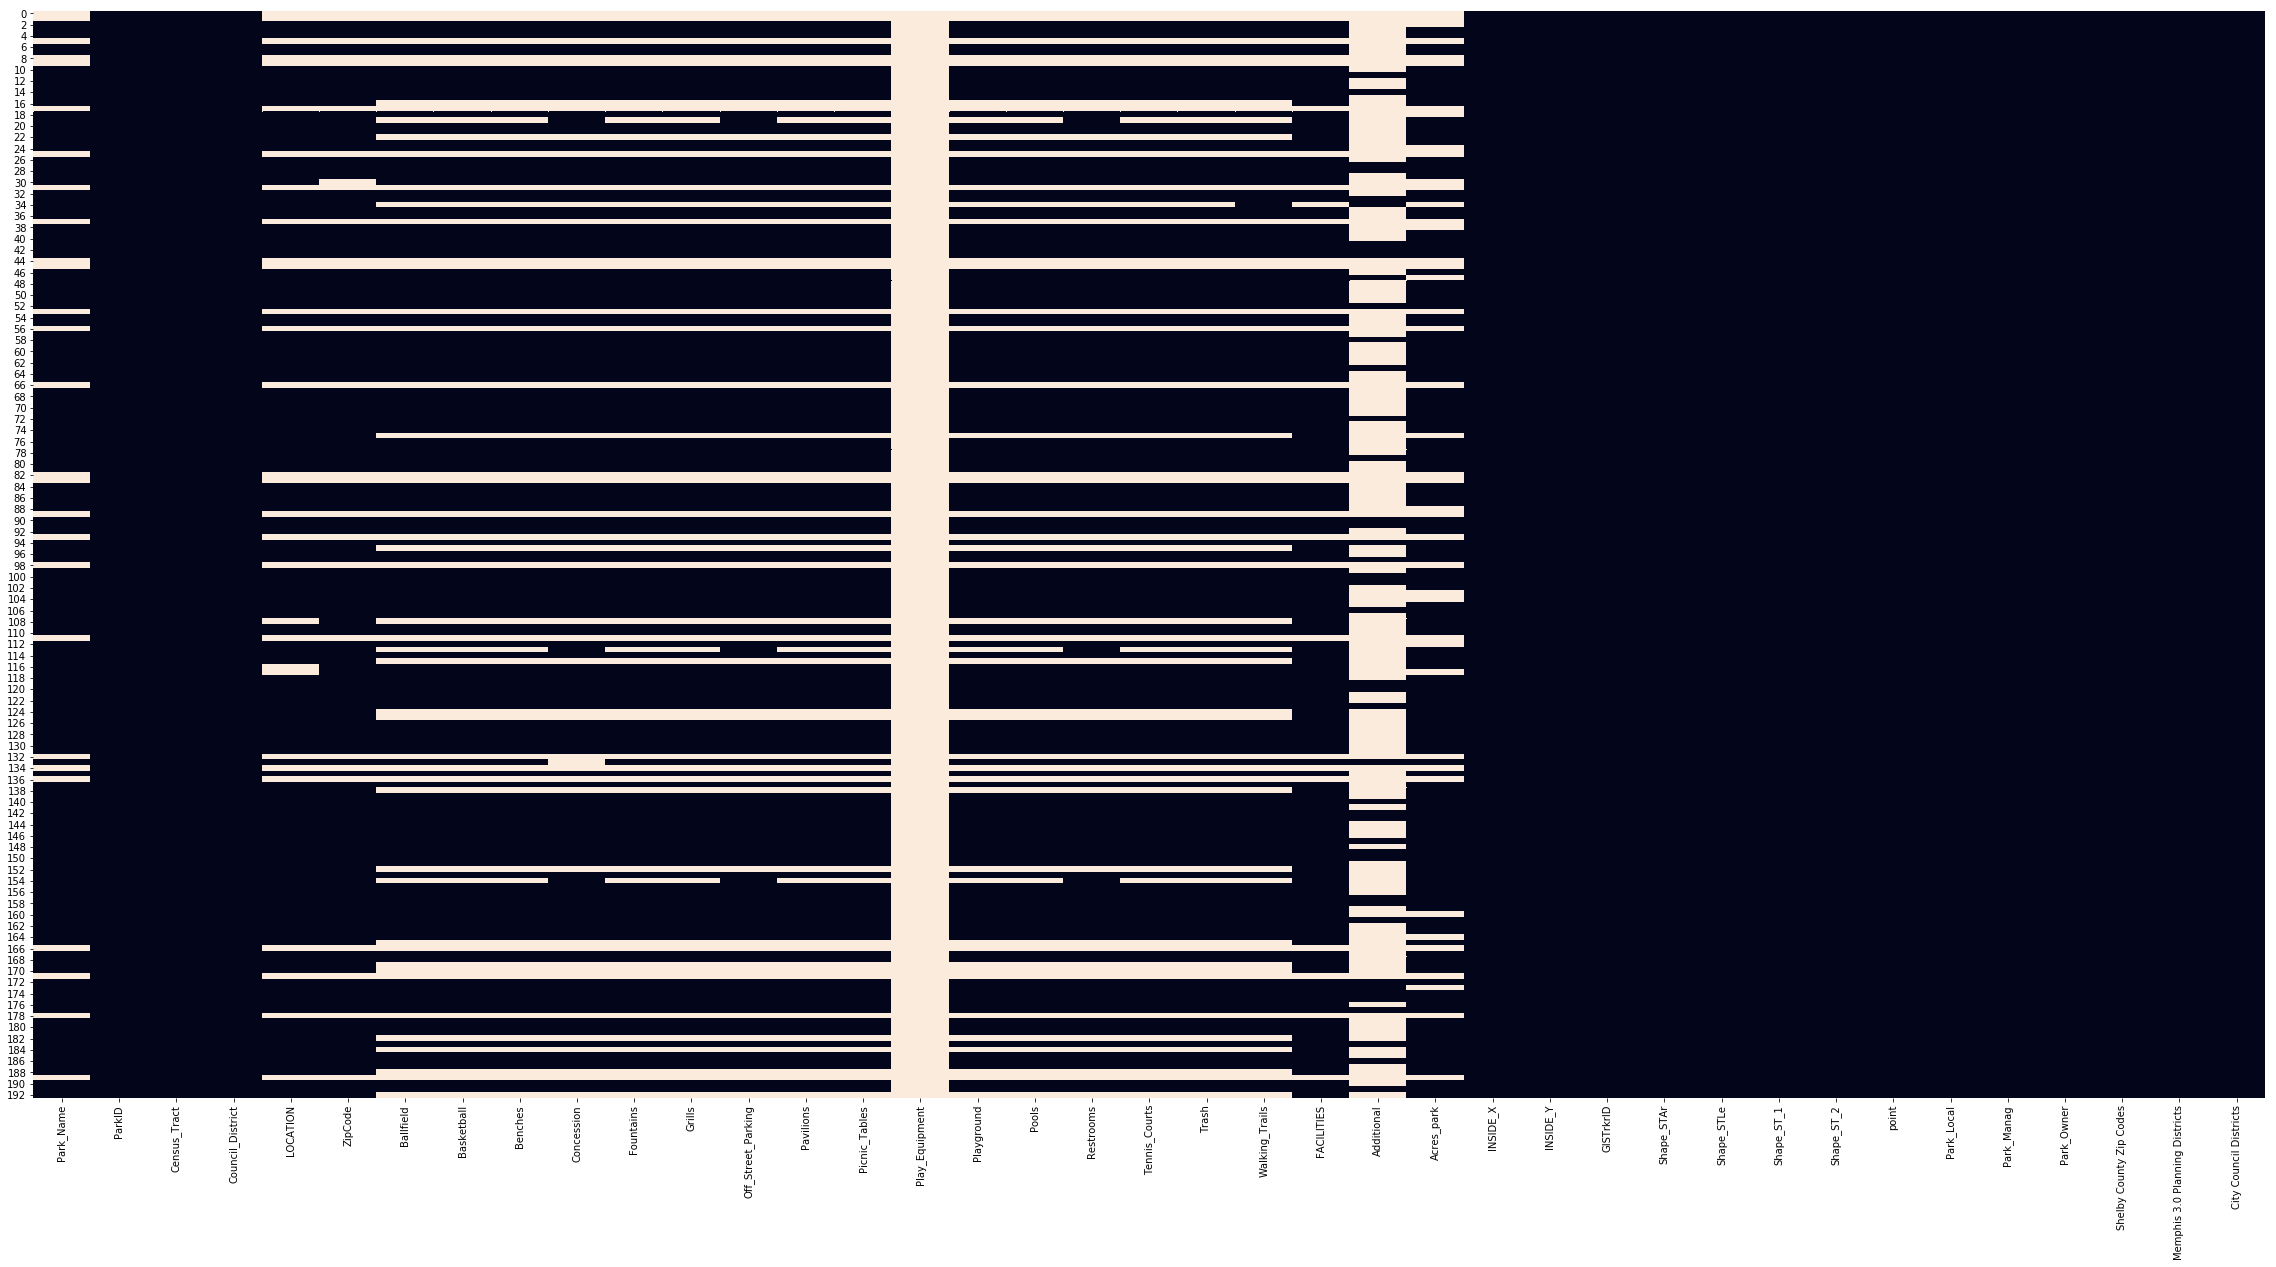

In [5]:
plt.figure(figsize=(40,20))
sns.heatmap(mem_park_df.isnull(), cbar=False);

## Data cleaning
After having a first look of the data, a quick celaning will be made, by removing columns are not going to be used and replacing the null value with a specific value.

### Columns removal
The columns that are going to be removed are:
* ParkID
* Census_Tract
* INSIDE_X
* INSIDE_Y
* GISTrkrID
* Shape_STLe
* Shape_STAr
* Shape_ST_1
* Shape_ST_2
* point
* Park_Local
* Park_Manag
* Park_Owner
* Shelby County Zip Codes
* Memphis 3.0 Planning Districts
* City Council Districts
* FACILITIES
* Additional
* Play_Equipment

In [6]:
# Declaring an array with the columns to remove
column_drop = ['ParkID','Census_Tract','INSIDE_X','INSIDE_Y','GISTrkrID','Shape_STLe','Shape_STAr','Shape_ST_1','Shape_ST_2','point','Park_Local','Park_Manag','Park_Owner','Shelby County Zip Codes','Memphis 3.0 Planning Districts','City Council Districts',
             'FACILITIES','Additional','Play_Equipment']

# Removing the columns
mem_park_df.drop(column_drop, axis=1, inplace=True)

In [7]:
mem_park_df.head(10)

,Park_Name,Council_District,LOCATION,ZipCode,Ballfield,Basketball,Benches,Concession,Fountains,Grills,Off_Street_Parking,Pavilions,Picnic_Tables,Playground,Pools,Restrooms,Tennis_Courts,Trash,Walking_Trails,Acres_park
0,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Madison & Monroe Park,6,Madison & Monroe,38103.0,no,no,no,no,no,no,no,no,no,no,no,no,no,False,no,NaN
3,Frayser Park,7,2907 N. Watkins,38127.0,yes,indoor & outdoor,no,no,no,no,yes,yes,no,yes,Outdoor,in center,8 outdoor,False,1.5 mi,40.54
4,Cash Park,6,Ford Rd @ Deerskin Dr,38109.0,yes,outdoor,no,no,no,no,yes,no,no,yes,no,no,no,False,.5 mi,22.00
5,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Germanshire Park,2,Germantown Rd. @ Germanshire Rd.,38125.0,no,no,no,no,no,no,at school,yes,no,yes,no,no,no,False,.5 mi,14.00
7,LE Brown,6,617 S. Orleans,38126.0,yes,outdoor,no,no,no,no,no,2,no,yes,Outdoor,yes,no,False,no,6.00
8,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
mem_park_df.dtypes

Park_Name              object
Council_District        int64
LOCATION               object
ZipCode               float64
Ballfield              object
Basketball             object
Benches                object
Concession             object
Fountains              object
Grills                 object
Off_Street_Parking     object
Pavilions              object
Picnic_Tables          object
Playground             object
Pools                  object
Restrooms              object
Tennis_Courts          object
Trash                  object
Walking_Trails         object
Acres_park            float64
dtype: object

### Changing null value to a specific one

#### Yes or No
Here the value of the selected column will be changed into _Yes_ or _No_, for simplyfing the whole dataset

##### Ballfield

In [9]:
# Viewing the count of the differetn values
mem_park_df['Ballfield'].value_counts()

no                      86
yes                     49
8                        1
lighted                  1
Lighted                  1
2                        1
9                        1
3- lighted               1
3 with lights            1
5 fields with lights     1
5-lighted                1
4 with lights            1
Name: Ballfield, dtype: int64

In [10]:
for i in range(len(mem_park_df)):
    if (mem_park_df.loc[i,'Ballfield'] != 'no'):
        mem_park_df.loc[i,'Ballfield'] = 'yes'

##### Basketball

In [11]:
# Viewing the count of the differetn values
mem_park_df['Basketball'].value_counts()

no                    94
outdoor               21
indoor                11
indoor & outdoor      11
2 outdoor              4
yes                    1
2 Outdoor              1
in/outdoor             1
indoor and outdoor     1
Name: Basketball, dtype: int64

In [12]:
for i in range(len(mem_park_df)):
    if (mem_park_df.loc[i,'Basketball'] != 'no'):
        mem_park_df.loc[i,'Basketball'] = 'yes'

##### Concession

In [13]:
# Viewing the count of the differetn values
mem_park_df['Concession'].value_counts()

no             134
yes             12
yes  closed      1
Name: Concession, dtype: int64

In [14]:
for i in range(len(mem_park_df)):
    if (mem_park_df.loc[i,'Concession'] != 'no'):
        mem_park_df.loc[i,'Concession'] = 'yes'

##### Fountains

In [15]:
# Viewing the count of the differetn values
mem_park_df['Fountains'].value_counts()

no     110
yes     34
2        1
Name: Fountains, dtype: int64

In [16]:
for i in range(len(mem_park_df)):
    if (mem_park_df.loc[i,'Fountains'] != 'no'):
        mem_park_df.loc[i,'Fountains'] = 'yes'

##### Grills

In [17]:
# Viewing the count of the differetn values
mem_park_df['Grills'].value_counts()

no               140
yes                4
4 at Pavilion      1
Name: Grills, dtype: int64

In [18]:
for i in range(len(mem_park_df)):
    if (mem_park_df.loc[i,'Grills'] != 'no'):
        mem_park_df.loc[i,'Grills'] = 'yes'

##### Off Street Parking

In [19]:
# Viewing the count of the differetn values
mem_park_df['Off_Street_Parking'].value_counts()

yes           66
no            63
at school     11
yes/ gated     7
in center      1
Name: Off_Street_Parking, dtype: int64

In [20]:
for i in range(len(mem_park_df)):
    if (mem_park_df.loc[i,'Off_Street_Parking'] != 'no'):
        mem_park_df.loc[i,'Off_Street_Parking'] = 'yes'

##### Pavilions

In [21]:
# Viewing the count of the differetn values
mem_park_df['Pavilions'].value_counts()

no     89
yes    47
2       5
3       2
1       1
7       1
Name: Pavilions, dtype: int64

In [22]:
for i in range(len(mem_park_df)):
    if (mem_park_df.loc[i,'Pavilions'] != 'no'):
        mem_park_df.loc[i,'Pavilions'] = 'yes'

##### Picnic Tables

In [23]:
# Viewing the count of the differetn values
mem_park_df['Picnic_Tables'].value_counts()

no     113
yes     28
2        2
6        1
10       1
Name: Picnic_Tables, dtype: int64

In [24]:
for i in range(len(mem_park_df)):
    if (mem_park_df.loc[i,'Picnic_Tables'] != 'no'):
        mem_park_df.loc[i,'Picnic_Tables'] = 'yes'

##### Playground

In [25]:
# Viewing the count of the differetn values
mem_park_df['Playground'].value_counts()

yes    76
no     68
2       1
Name: Playground, dtype: int64

In [26]:
for i in range(len(mem_park_df)):
    if (mem_park_df.loc[i,'Playground'] != 'no'):
        mem_park_df.loc[i,'Playground'] = 'yes'

##### Pools

In [27]:
# Viewing the count of the differetn values
mem_park_df['Pools'].value_counts()

no         130
Outdoor     12
Indoor       2
indoor       1
Name: Pools, dtype: int64

In [28]:
for i in range(len(mem_park_df)):
    if (mem_park_df.loc[i,'Pools'] != 'no'):
        mem_park_df.loc[i,'Pools'] = 'yes'

##### Restrooms

In [29]:
# Viewing the count of the differetn values
mem_park_df['Restrooms'].value_counts()

no                       112
in center                 17
yes                       14
in center & poolhouse      2
tennis center              1
yes closed                 1
In Pool House              1
Name: Restrooms, dtype: int64

In [30]:
for i in range(len(mem_park_df)):
    if (mem_park_df.loc[i,'Restrooms'] != 'no'):
        mem_park_df.loc[i,'Restrooms'] = 'yes'

##### Tennis Courts

In [31]:
# Viewing the count of the differetn values
mem_park_df['Tennis_Courts'].value_counts()

no                        133
2 outdoor                   2
4 outdoor                   2
2- outdoor                  1
2 indoor and 4 outdoor      1
4 in/ 8 out                 1
8 outdoor                   1
4 outdoor with lights       1
8 outdoor (L)               1
8 outdoor with lights       1
4 indoor 8 outdoor          1
Name: Tennis_Courts, dtype: int64

In [32]:
for i in range(len(mem_park_df)):
    if (mem_park_df.loc[i,'Tennis_Courts'] != 'no'):
        mem_park_df.loc[i,'Tennis_Courts'] = 'yes'

##### Trash

In [33]:
# Viewing the count of the differetn values
mem_park_df['Trash'].value_counts()

False    114
True      31
Name: Trash, dtype: int64

In [34]:
for i in range(len(mem_park_df)):
    if (mem_park_df.loc[i,'Trash'] == False):
        mem_park_df.loc[i,'Trash'] = 'no'
    elif (mem_park_df.loc[i,'Trash'] == True):
        mem_park_df.loc[i,'Trash'] = 'yes'

##### Walking Trails

In [35]:
# Viewing the count of the differetn values
mem_park_df['Walking_Trails'].value_counts()

no        87
.5 mi     25
1 mi      10
.33 mi     4
.75 mi     4
yes        3
.2 mi      3
1.5 mi     2
.25 mi     2
1.7 mi     1
2 mi       1
1/2 mi     1
1/3 mi     1
.15 mi     1
.1 mi      1
Name: Walking_Trails, dtype: int64

In [36]:
for i in range(len(mem_park_df)):
    if (mem_park_df.loc[i,'Walking_Trails'] != 'no'):
        mem_park_df.loc[i,'Walking_Trails'] = 'yes'

In [37]:
mem_park_df.shape

(193, 20)

### Filtering out rows
Here will be filtered out the rows that have not a _Park Name_, this is to simply the use of APIs for retriving the longitude and latitude.
Also the row containing NaN value in the column of _Acres Parks_ will be removed

In [38]:
mem_park_df = mem_park_df[mem_park_df['Park_Name'].notna()]

In [39]:
mem_park_df = mem_park_df[mem_park_df['Acres_park'].notnull()]

## Re-indexing

In [40]:
mem_park_df = mem_park_df.reset_index(drop=True)

In [41]:
mem_park_df.head(10)

,Park_Name,Council_District,LOCATION,ZipCode,Ballfield,Basketball,Benches,Concession,Fountains,Grills,Off_Street_Parking,Pavilions,Picnic_Tables,Playground,Pools,Restrooms,Tennis_Courts,Trash,Walking_Trails,Acres_park
0,Frayser Park,7,2907 N. Watkins,38127.0,yes,yes,no,no,no,no,yes,yes,no,yes,yes,yes,yes,no,yes,40.54
1,Cash Park,6,Ford Rd @ Deerskin Dr,38109.0,yes,yes,no,no,no,no,yes,no,no,yes,no,no,no,no,yes,22.00
2,Germanshire Park,2,Germantown Rd. @ Germanshire Rd.,38125.0,no,no,no,no,no,no,yes,yes,no,yes,no,no,no,no,yes,14.00
3,LE Brown,6,617 S. Orleans,38126.0,yes,yes,no,no,no,no,no,yes,no,yes,yes,yes,no,no,no,6.00
4,Booth Park,6,S. Parkway @ Texas,38106.0,no,yes,no,no,no,no,no,no,no,no,no,no,no,no,no,3.50
5,Medal of Honor Park,3,Tchulahoma @ Oak Lake,38118.0,no,no,no,no,no,no,yes,no,no,no,no,no,no,no,yes,20.00
6,Westwood Park,6,810 Western Park,38109.0,no,yes,yes,no,no,no,yes,no,no,yes,yes,yes,no,yes,yes,16.20
7,Williamson Park,5,292 Williamson,38112.0,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,4.50
8,Crump Park,6,Delaware @ Crump,38106.0,no,no,no,no,no,no,no,no,yes,no,no,no,no,no,no,4.30
9,Robert Church Park,6,Beale St. @ Fourth,38126.0,no,no,no,no,no,no,no,no,yes,no,no,no,no,no,no,7.68


## Saving the editing
Now, the new dataframe will be safed into another _.CSV_ file, that will be used in the Web App

In [42]:
mem_park_df.to_csv('Memphis_Park.csv',index=False);